# Function ellipse

## Synopse

Create a binary ellipse image.

- **g = ellipse(s, r, c, theta)**

  - Output:
      - **g**: Image.
  - Input:
      - **s**: Image. [rows cols], output image dimensions.
      - **r**: Double. [rRows rCols], radius for y and x directions.
      - **c**: Image. [row0 col0], center of the circle.
      - **theta**: Double. Angle rotation in radians. (optional)

## Description

The $ellipse$ function creates a binary image with dimensions given by $s$, radius given by $r (r[0] = rRows; r[1] = rCols)$ and center given by $c$. The pixels inside the circle are one and outside zero.


## Function code

In [6]:
import numpy as np
 
def ellipse(s, r, c, theta=0):
    rows, cols = s[0], s[1]
    rr0,  cc0  = c[0], c[1]
    rr, cc = np.meshgrid(range(rows), range(cols), indexing='ij')
    rr = rr - rr0
    cc = cc - cc0
    cos = np.cos(theta)
    sen = np.sin(theta)
    i = cos/r[1]
    j = sen/r[0]
    m = -sen/r[1]
    n = cos/r[0]
    g = ((i*cc + m*rr)**2 + (j*cc + n*rr)**2) <= 1
    return g

In [1]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python ellipse.ipynb
    import numpy as np
    import sys,os
    import matplotlib.image as mpimg
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia


[NbConvertApp] Converting notebook ellipse.ipynb to python
[NbConvertApp] Writing 2389 bytes to ellipse.py


## Examples

### Numerical example:

In [3]:
if testing:
    g = ia.ellipse([16,16], [2,4], [8,8], np.pi * 0.25)
    print('g:\n', g.astype(int))

g:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Measuring time:

Computational time (10k, 10k) is 0.01 seconds.


""
Ellipse

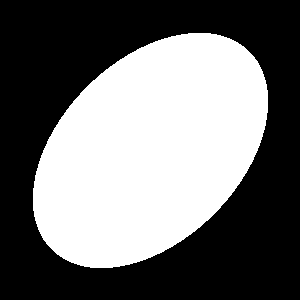

In [4]:
if testing:
    from time import time
    t = time()
    g = ia.ellipse([300,300], [90,140], [150,150], np.pi * 0.25)
    tend = time()
    print('Computational time (10k, 10k) is {0:.2f} seconds.'.format(tend - t))
    ia.adshow(g, "Ellipse")

In [6]:
if testing:
    print('Computational time (10k, 10k) is:')
    %timeit ia.ellipse([300,300], [90,140], [150,150], np.pi * 0.25)

Computational time (10k, 10k) is:
100 loops, best of 3: 1.72 ms per loop


## Equation

$$
    \begin{matrix} 
        \frac{((x-center_x)\cos(\theta) - (y-center_y)\sin(\theta))^2}{r_x^2}
            +
        \frac{((x-center_x)\sin(\theta) - (y-center_y)\cos(\theta))^2}{r_y^2} <= 1
    \end{matrix}
$$

## Contributions

- Rafael Berri, 23sep2013: initial function.